In [19]:
import os
import sys
import pickle
import numpy as np
import igraph as ig
import pandas as pd
import matplotlib.pyplot as plt
from plot_auxiliary import *

from mpl_settings_v3 import *

from auxiliary import get_base_network_name, supported_attacks, get_property_file_name, simple_props
from auxiliary import get_edge_weights, get_number_of_nodes, read_data_file

In [44]:
net_type = 'DT'
param = 'param'

size = 512

min_seed = 0
max_seed = 1000
seeds = range(min_seed, max_seed)
n_seeds = max_seed - min_seed

N = get_number_of_nodes(net_type, size)

attacks = ['BtwU']

dfs_dict = {}
for attack in attacks:
    print(attack)
    dir_name = os.path.join('..', 'networks', net_type)
    base_net_name, base_net_name_size = get_base_network_name(net_type, size, param)
    base_net_dir = os.path.join(dir_name, base_net_name, base_net_name_size)

    perc_dfs = {}
    perc_dfs[N] = load_dataframe(net_type, N, param, attack)
    
    dfs = []
    for k, seed in enumerate(seeds):

        net_name = base_net_name_size + '_{:05d}'.format(seed)
        net_dir = os.path.join(base_net_dir, net_name)
        attack_dir = os.path.join(net_dir, attack)

        properties_file = os.path.join(attack_dir, 'properties.pickle')
        if not os.path.isfile(properties_file):
            continue
        with open(properties_file, 'rb') as f:
            data = pickle.load(f)
        df = pd.DataFrame(data)
        df['f'] = df.index.values / N
        dfs.append(df)
    
    dfs_dict[attack] = dfs

BtwU


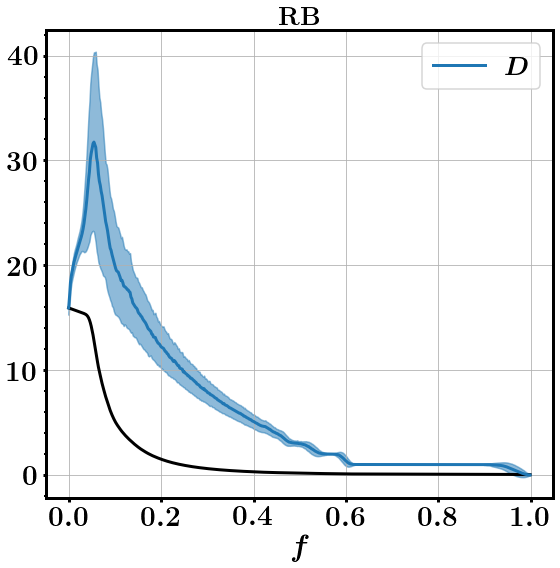

In [45]:
ncols = len(attacks)
nrows = 1
fig, axes = plt.subplots(figsize=(8*ncols, 8*nrows), ncols=ncols, nrows=nrows)

if ncols == 1:
    axes = np.array([axes])

for i, attack in enumerate(attacks):
    dfs = dfs_dict[attack]
    
    df = pd.concat(dfs)
    df_std = df.groupby(by='f').std()
    df = df.groupby(by='f').mean()

    X = df.index

    ax = axes[i]
    ax.set_title(attack_dict[attack], fontsize=26)
    ax.grid(True)
    ax.set_xlabel(r'$f$')
    #ax.set_yticks(range(13))
    ax.plot(perc_dfs[N].f, perc_dfs[N].Sgcc*df.D[0], color='k')
    
    ax.plot(X, df.D, label=r'$D$')
    y1 = df.D - df_std.D
    y2 = df.D + df_std.D
    ax.fill_between(X, y1, y2, color='C0', alpha=0.5)  

    ax.legend()

plt.tight_layout()
plt.show()